In [1]:
import pandas as pd
import matplotlib.pyplot as plt

    

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.pipeline import Pipeline,FeatureUnion

from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score

import numpy as np

from ipywidgets import interact

In [42]:
loan_train = pd.read_csv('loan_train.csv')
loan_test = pd.read_csv('loan_test.csv')

In [43]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [297]:
loan_train.iloc[:, :5].head()

,Gender,Married,Dependents,Education,Self_Employed
0,Male,No,0,Graduate,No
1,Male,Yes,1,Graduate,No
2,Male,Yes,0,Graduate,Yes
3,Male,Yes,0,Not Graduate,No
4,Male,No,0,Graduate,No


In [296]:
loan_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotIncome', 'payable_per_month', 'frac_income'],
      dtype='object')

In [44]:
def change(x):
    if x == 'Y':
        return 1
    else: 
        return 0
loan_train['Loan_Status'] = loan_train['Loan_Status'].apply(change)


In [45]:

continous_features= ['ApplicantIncome','LoanAmount','CoapplicantIncome']

In [46]:
loan_train = loan_train.drop(columns=['Loan_ID'])

In [47]:
loan_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#loan_train['Loan_Amount_Term'] = loan_train['Loan_Amount_Term']/12*12
loan_train['TotIncome'] = loan_train['ApplicantIncome'] + loan_train['CoapplicantIncome']

In [49]:

loan_train['payable_per_month'] = loan_train['LoanAmount']*1000/loan_train['Loan_Amount_Term']
loan_train['frac_income'] = loan_train['payable_per_month']/loan_train['TotIncome']*100
#loan_train[(loan_train['Credit_History'] == 0) & (loan_train['Loan_Status'] == 1)].iloc[:30] 
factors = ['ApplicantIncome','CoapplicantIncome','TotIncome','Loan_Amount_Term','frac_income','payable_per_month','Credit_History','Loan_Status']
#loan_train[loan_train['Loan_Status'] == 0].iloc[:30]

In [50]:
labels = loan_train['Loan_Status']

In [51]:
def convert(x):
    if x < 168:
        return 0
    else:
        return 1

In [52]:
features = ['Gender','Married','Dependents','Education','Self_Employed','Loan_Amount_Term','loan_term','Property_Area','Credit_History']
new_features = features + ['Loan_Status']
data_len = len(loan_train)
#df = loan_train.dropna(subset=features)
def category_survival( features):
    df = loan_train.dropna(subset= [features])
    category=  dict(df.groupby(features)['Loan_Status'].sum()/data_len*100)
    success_rate = dict(df.groupby(features)['Loan_Status'].sum()/df.groupby(features)['Loan_Status'].count()*100)
    print(f'Success rate for each category of {features}')
    [print(f'{cat} : {percentage}% , {success_rate[cat]}') for cat, percentage in category.items()]

In [53]:
@interact
def draw_count(index=new_features):
    table = pd.crosstab(index=loan_train[index],columns='count',margins=True)
    return table

interactive(children=(Dropdown(description='index', options=('Gender', 'Married', 'Dependents', 'Education', '…

In [54]:
@interact
def draw_table(index=new_features, column= new_features):
    table = pd.crosstab(index=loan_train[index],columns=loan_train[column],margins=True)#,normalize = 'index'
    return table

interactive(children=(Dropdown(description='index', options=('Gender', 'Married', 'Dependents', 'Education', '…

In [55]:


@interact
def plot_bar(features = features):
    category_survival(features)
    loan_train[features].hist()
    

interactive(children=(Dropdown(description='features', options=('Gender', 'Married', 'Dependents', 'Education'…

In [56]:
@interact
def plot_bar(features = features):
    category_survival(features)
    #non_null_loans[features].hist()

interactive(children=(Dropdown(description='features', options=('Gender', 'Married', 'Dependents', 'Education'…

In [57]:
continous_features = ['ApplicantIncome','LoanAmount','CoapplicantIncome','TotIncome','payable_per_month']
@interact
def box_plot(features= continous_features):
    plt.boxplot(np.cbrt(loan_train[features].dropna()))

interactive(children=(Dropdown(description='features', options=('ApplicantIncome', 'LoanAmount', 'CoapplicantI…

#### Let's use the cube root to trasform the continous features.

In [58]:
    
np.cbrt(loan_train[continous_features]).describe()

,ApplicantIncome,LoanAmount,CoapplicantIncome,TotIncome,payable_per_month
count,614.000000,592.000000,614.000000,614.000000,578.000000
mean,16.520506,5.120375,7.480926,18.310466,7.452844
std,3.939230,0.870312,7.108669,3.755365,1.596912
min,5.313293,2.080084,0.000000,11.297658,2.924018
25%,14.223454,4.641589,0.000000,16.090631,6.589385
50%,15.621999,5.039684,10.592145,17.561957,7.148370
75%,17.961849,5.517848,13.194779,19.593221,8.009826
max,43.267487,8.879040,34.668156,43.267487,20.991682


In [59]:
@interact 
def corr(column1 = continous_features, column2 = continous_features):
    print(loan_train[column1].corr(loan_train[column2]))
    plt.scatter(loan_train[column1],loan_train[column2])

interactive(children=(Dropdown(description='column1', options=('ApplicantIncome', 'LoanAmount', 'CoapplicantIn…

# Handling Missing Values

In [60]:
mode = loan_train['Loan_Amount_Term'].mode()
loan_train['Loan_Amount_Term'].fillna(value= mode[0],inplace=True)

In [61]:
good_credit = loan_train[(loan_train['Credit_History'] == 1)]
#print(len(good_credit))
#len(good_credit[good_credit['Loan_Status']== 0])

In [62]:
history_pred = ['Self_Employed','Loan_Status','ApplicantIncome']

def fill_na(loan):
    X= loan.copy()
    index = loan['Self_Employed'].dropna().index 
    #print(modes)
    X= X.loc[index,:]
    history_pred.append('Credit_History')
    return X[history_pred]

X_credit = fill_na(loan_train)

credit =  X_credit['Credit_History']
X_credit = X_credit.drop('Credit_History',axis=1)


In [63]:
index = credit.dropna().index
X_credit= X_credit.loc[index,:]
cred = credit[index]

encode_X = OrdinalEncoder().fit_transform(X_credit)


### Since the credit history is the most important feature , lets try and predict the missing values using the loan status and other possible features. I will use the Xgbclassifier to predict the credit history section

In [64]:
ran_for = XGBClassifier(learning_rate=0.01,scale_pos_weight=6)
param_grid = {
    'max_depth': [2,3,4,5,6,7,8,9,10],
    'n_estimators' : range(50,4000,5),
    'scale_pos_weight': range(1,10),
    'max_features': [1,2,3,4]
}

forest_rand = RandomizedSearchCV(ran_for,param_grid,cv=5, n_jobs=2,random_state=0,verbose=1)
forest_rand.fit(encode_X,cred)
accuracy_score(cred,forest_rand.predict(encode_X))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   37.7s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   40.2s finished


0.9479553903345725

In [65]:
forest_rand = forest_rand.best_estimator_

In [66]:
no_cred  = loan_train[loan_train['Credit_History'].isnull()]
index = no_cred.index
no_cred = no_cred[['Self_Employed','Loan_Status','ApplicantIncome']]
no_cred['Self_Employed'].fillna(value='No',inplace = True)
encode  = OrdinalEncoder().fit_transform(no_cred)

In [67]:
cred_result = forest_rand.predict(encode)
loan_train.loc[index,'Credit_History']= cred_result

In [68]:
loan_train.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
TotIncome             0
payable_per_month    36
frac_income          36
dtype: int64

# Preprocessing The Data

For simplicity and also due to the correlation between dataset features , i will use a KNN imputation algorithm to solve the missing values.

In [322]:
#loan_train_copy = loan_train.copy(deep=True)
    
class ColTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self,columns):
        #super.__init__()
        self.columns = columns
        
    def fit(self,X,y=None):
        return self
    
    def ord_encode(self,data):
        non_null = np.array(data.dropna())
        non_null = non_null.reshape(-1,1)
        encoded_data = self.encoder.fit_transform(non_null)
        data.loc[data.notnull()] = np.squeeze(encoded_data)
        #print('yes')
        return data
    
    def transform(self,X):
        Xt = X.loc[:,self.columns]
        self.encoder = OrdinalEncoder()
        for feature in self.columns:  
            data = Xt.loc[:,feature]
            Xt.loc[:,feature] = self.ord_encode(data)
        return Xt
    

        #return Xt
        
class Normalize(BaseEstimator,TransformerMixin):
    def __init__(self,columns):
        self.columns = columns
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        Xt = np.cbrt(X[self.columns])
        Xt['tot_income'] = np.cbrt(X['CoapplicantIncome'] + X['ApplicantIncome'])
        Xt['payable_per_month'] = np.cbrt(X['LoanAmount']*1000/ X['Loan_Amount_Term'])
        Xt[self.columns] = np.cbrt(Xt[self.columns])
        return Xt        
        
    
class One_Hot(BaseEstimator, TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
        self.encoder = OneHotEncoder(sparse=False)
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        print(X.shape)
        cat = self.encoder.fit_transform(X[:,0:self.cols])
        X = X[:,self.cols:]           
        Xt = np.hstack((cat,X))
        print(cat[0])
        print(cat.shape)
        print(X.shape)
        print(Xt.shape)
        return Xt
     
class RawEncoder(TransformerMixin,BaseEstimator):
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        Xt = X.loc[:,categorical_columns]
        Xt = OrdinalEncoder().fit_transform(Xt)
        return Xt

In [323]:
cat_columns = ['Credit_History']
income_loan = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [324]:

test_transformer = FeatureUnion([('encoder',ColTransformer(cat_columns)),('normalize', Normalize(income_loan))])
#forest_encoder = Custom_Encoder()

transformer  = FeatureUnion([('col_transformer',ColTransformer(cat_columns)),('normalize',Normalize(income_loan))])


In [328]:
#handle Nan values using the KNN imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, weights='distance')
test_pipe = Pipeline([('transformer',test_transformer),('imputer',imputer),('scaler',StandardScaler())]) 
#imputer_pipe = Pipeline([('transformer',transformer),('imputer',imputer),('one_hot', One_Hot(len(cat_columns)))])
#forest_data = forest_imputer_pipe.fit_transform(loan_train)
#data = imputer_pipe.fit_transform(loan_train)
test = test_pipe.fit_transform(loan_train)


### Now let's spotcheck several models.

In [330]:

#X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.1,random_state=0)
X_train,X_test,y_train,y_test = train_test_split(test,labels,test_size = 0.1,random_state=0)

In [331]:
def performance(perf):
        for name, score in perf.items():
            print(f'{name} cv_score: {np.mean(score)}')

In [332]:
models = {'logistic_regressor': LogisticRegression(),
          'svc': SVC(kernel='rbf'),
         'random_forest' : RandomForestClassifier(),
         #'knn' : KNeighborsClassifier(),
          'xgboot': XGBClassifier(),}
           #'nb' : CategoricalNB() }

In [333]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv =StratifiedKFold(n_splits=10)

In [334]:


def spot_check():
    model_performance = {}
    for name, model in models.items() :
        #pipe = Pipeline([('imputer',imputer_pipe),(name, model)])
        #model.fit(data,labels)
        #cv_score = model.score(X_test,y_test)
        cv_score = cross_val_score(model,test,labels,scoring='accuracy',cv=10)
        model_performance[name] = cv_score
        
    return model_performance

The use of PCA to reduce correlation and dimension did not boost the performance of the models. The reason may be that the features are mostly categorical

In [459]:
#performance(spot_check())

# Results after spotchecking 
- logistic_regressor cv_score: 0.8144632469592809
- svc cv_score: 0.6873083024854575
- random_forest cv_score: 0.8029878371232153
- xgboot cv_score: 0.8095980962453728

In [335]:
forest =  RandomForestClassifier(n_estimators=300)
forest.fit(test,labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [338]:
print(f'Accuracy score : {accuracy_score(y_test,forest.predict(X_test))}')
print(f'F1_score : {f1_score(y_test,forest.predict(X_test))}')
print(f'Precision_score : {precision_score(y_test,forest.predict(X_test))}')



Accuracy score : 1.0
F1_score : 1.0
Precision_score : 1.0


In [339]:
predictors = cat_columns + income_loan
predictors.append('tot_income')
predictors.append('payable_per_month')


#predictors = ['Married','Credit_History','CoapplicantIncome','ApplicantIncome','TotIncome','Property_Area','Loan_bin']

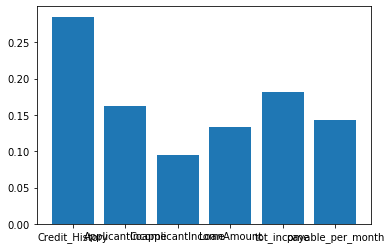

['Credit_History', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'tot_income', 'payable_per_month']
6


In [340]:
#forest.score(X_test,y_test)

plt.bar(predictors, list(forest.feature_importances_))
plt.show()
print((predictors))
print(len(forest.feature_importances_))

The predictors in order of importance : 
- Credit_History
- TotIncome
- ApplicantIncome
- LoanAmount
- CoapplicantIncome
- Property_Area
- Loan_amount_term

so lets take a look at the correlation between these features

## Tuning the KNN_Classifier Model.


In [357]:
from shutil import rmtree
from tempfile import mkdtemp
cachedir = mkdtemp()

param_grid = {
            'n_neighbors': range(1,10),
             'weights': ['uniform','distance']
    }
neighbors_classifier = KNeighborsClassifier()
#knn_random_pipe =Pipeline([('imputer', imputer_pipe),('classifier', neighbors_classifier)])
knn_search = GridSearchCV(neighbors_classifier,param_grid,cv=cv,n_jobs=2,verbose = 1)
knn_search.fit(test,labels)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:    1.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid={'n_neighbors': range(1, 10),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [358]:
knn_best_estimator = knn_search.best_estimator_
knn_search.best_params_

{'n_neighbors': 7, 'weights': 'uniform'}

In [359]:
knn_best_estimator.score(X_test,y_test)

0.8870967741935484

In [360]:
knn_cv_score = cross_val_score(knn_best_estimator,data,labels,scoring='accuracy',cv=10)
np.mean(knn_cv_score)

0.7769434161819143

# Using XGBClassifier

## I try to find the best parameters for the xgb model using this dataset.

In [191]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
def modelfit(alg, dtrain, dtest,useTrainCV=True, cv_folds=cv, early_stopping_rounds=60):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain, label=Y_train)
        xgtest = xgb.DMatrix(dtest)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='accuracy', early_stopping_rounds=early_stopping_rounds, verbose_eval=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain, Y_train,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain)
    dtrain_predprob = alg.predict_proba(dtrain)[:,1]
        
    #Print model report:
    print("\nModel Report")
    print(f'Accuracy : {accuracy_score(Y_train, dtrain_predictions)}' )
    print(f"AUC Score (Train): { roc_auc_score(Y_train, dtrain_predprob)}" )
    
#     Predict on testing data:
    print(' ')
    print(cvresult.shape[0])
    print('')
    dtest_predprob = alg.predict_proba(dtest)[:,1]
    dtest_predictions=  alg.predict(dtest)
    #results = test_results.merge(dtest[['ID','predprob']], on='ID')
    print(f'Accuracy : {accuracy_score(Y_test,dtest_predictions)}')
    print(f'AUC Score (Test): {roc_auc_score(Y_test, dtest_predprob)}')
                
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')

In [197]:
#xgb1 =  XGBClassifier( learning_rate =0.01, n_estimators=5000, max_depth=9, min_child_weight=3, gamma=0, subsample=0.8, 
                   # colsample_bytree=0.8,objective= 'binary:logistic', cv_folds= 6,nthread=4, scale_pos_weight=1,reg_alpha=0.02, seed=27)
#modelfit(xgb1, x_train, x_test, predictors)

In [551]:
param_test1 = {
    'scale_pos_weight': range(1,10)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=24, max_depth=9,
                                        min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,reg_alpha=0.02, seed=27), 
                       param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=8,verbose=1)
gsearch1.fit(test,labels)

Fitting 8 folds for each of 9 candidates, totalling 72 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done  72 out of  72 | elapsed:    3.1s finished
c:\users\jeffery\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=8, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=9, min_child_weight=3,
                                     missing=None, n_estimators=24, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0.02,
                                     reg_lambda=1, scale_pos_weight=1, seed=27,
                                     silent=None, subsample=0.8, verbosity=1),
             iid=False, n_jobs=4, param_grid={'scale_pos_weight': range(1, 10)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [552]:
gsearch1.best_params_, gsearch1.best_score_

({'scale_pos_weight': 1}, 0.7776272224238026)

In [345]:
#xgb_best = gsearch1.best_estimator_
np.mean(cross_val_score(best_xgb,test,labels,scoring='accuracy',cv=5))

0.8094495535119286

## The best xgb model is below

In [361]:
best_xgb = XGBClassifier( learning_rate =0.01, n_estimators=354, max_depth=9,
                                        min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                        objective= 'binary:logistic', nthread=4, scale_pos_weight=1,reg_alpha=0.02, seed=27)
best_xgb.fit(test,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=3, missing=None, n_estimators=354, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.02, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

# Using Ensemble Model


In [347]:
import numpy as np
from sklearn.base import ClassifierMixin
from scipy import stats
from sklearn.utils import shuffle

class LoanEnsemble(BaseEstimator, TransformerMixin):
    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self,X,y):
        X_shuffled,y_shuffled = shuffle(X,y, n_samples=530)
        self.estimator.fit(X_shuffled,y_shuffled)
        return self
    
    def transform(self,X):
        return np.atleast_2d(self.estimator.predict(X)).T
    
class MajorityClassifier(BaseEstimator, ClassifierMixin):
    def fit(self,X,y):
        return self
    
    def predict(self,X):
        Xt = stats.mode(X.T)[0]
        Xt = Xt.T
        return Xt

In [348]:
ensemble = FeatureUnion([('knn', LoanEnsemble(knn_best_estimator)),
                        ('svc', LoanEnsemble(SVC(kernel='rbf'))),
                         
                         ('linear', LoanEnsemble(LogisticRegression())),
                        ('xgb_classifier', LoanEnsemble(best_xgb))])

ensemble_classifier  =  Pipeline([('ensemble',ensemble),('maj_classifier',MajorityClassifier())])
ensemble_classifier.fit(X_train,y_train)
print(ensemble_classifier.score(X_test,y_test))
#ensemble_classifier.predict(X_test)

0.8548387096774194


In [349]:
import dill
with open('ensemble.dll','wb') as f: 
    dill.dump(ensemble_classifier , f)

In [351]:
cv_score = cross_val_score(ensemble_classifier,test,labels,scoring='accuracy',cv=10)

In [352]:
np.mean(cv_score)

0.8111845584346906

# Using SVM for Classification and Hypertuning

In [353]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5)

In [362]:
param_grid = {
            'svc__gamma': np.logspace(-2,2,100),
             'svc__C': np.logspace(-2,2,100),
             }
scaler = StandardScaler()
svc = SVC(kernel='rbf')
svc_pipe = Pipeline([('svc', svc)],memory= cachedir)
random_svc = RandomizedSearchCV(svc_pipe,param_grid,cv=cv,n_jobs=2,verbose = 1,n_iter= 500,random_state=0)
random_svc.fit(test,labels)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  92 tasks      | elapsed:    2.8s
[Parallel(n_jobs=2)]: Done 1284 tasks      | elapsed:   21.7s
[Parallel(n_jobs=2)]: Done 2500 out of 2500 | elapsed:   35.6s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=Pipeline(memory='C:\\Users\\Jeffery\\AppData\\Local\\Temp\\tmpuo7sxrlo',
                                      steps=[('svc',
                                              SVC(C=1.0, break_ties=False,
                                                  cache_size=200,
                                                  class_weight=None, coef0=0.0,
                                                  decision_function_shape='ovr',
                                                  degree=3, gamma='scale',
                                                  kernel='rbf', max_iter=-1,
                                                  probabil...
       1.70735265e+01, 1.87381742e+01, 2.05651231e+01, 2.25701972e+01,
       2.47707636e+01, 2.71858824e+01, 2.98364724e+01, 3.27454916e+01,
       3.59381366e+01, 3.94420606e+01, 4.32876128e+01, 4.75081016e

In [363]:
best_svc  =  random_svc.best_estimator_
best_svc.fit(test,labels)

Pipeline(memory='C:\\Users\\Jeffery\\AppData\\Local\\Temp\\tmpuo7sxrlo',
         steps=[('svc',
                 SVC(C=0.08497534359086446, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma=0.02104904144512021, kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [364]:
best_svc.score(X_test,y_test)


0.8709677419354839

In [365]:
tuned_ensemble = FeatureUnion([('knn', LoanEnsemble(knn_best_estimator)),
                        ('svc', LoanEnsemble(best_svc)),
                         ('linear', LoanEnsemble(LogisticRegression())),
                        ('xgb_classifier', LoanEnsemble(best_xgb))])

ensemble_classifier2  =  Pipeline([('ensemble',tuned_ensemble),('maj_classifier',MajorityClassifier())])
ensemble_classifier2.fit(test,labels)
print(ensemble_classifier.score(X_test,y_test))
#ensemble_classifier.predict(X_test)

0.8548387096774194


In [366]:
tuned_score = cross_val_score(ensemble_classifier2,test,labels,scoring='accuracy',cv=10)
svc_score = cross_val_score(best_svc,test,labels,scoring='accuracy',cv=10)
print(np.mean(tuned_score))
print(np.mean(svc_score))

0.8079323109465891
0.8127974616604972


## Using randomForestClassifier for classification

In [79]:
forest_classifier = RandomForestClassifier()
#forest_classifier.fit(imputed_data, labels)
#forest_classifier.score(imputed_data,labels)

## Hypertuning the Random Forest Classifier model


In [367]:
from shutil import rmtree
from tempfile import mkdtemp
cachedir = mkdtemp()

param_grid = {
            'n_estimators': range(20,250,3),
             'max_features': range(1,5),
             'max_depth': range(2,15,2)
             }
forest_classifier = RandomForestClassifier()
forest_pipe = Pipeline([('forest',forest_classifier)],memory= cachedir)
forest_grid = RandomizedSearchCV(forest_classifier,param_grid,cv=cv,n_jobs=2,verbose = 1,n_iter= 100,random_state=0)
forest_grid.fit(test,labels)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   14.8s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   44.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:  1.7min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_sp...
                     

In [368]:
best_forest = forest_grid.best_estimator_
print(forest_grid.best_params_)
print(best_forest.score(X_test, y_test))


{'n_estimators': 230, 'max_features': 4, 'max_depth': 10}
0.9354838709677419


In [369]:
best_forest.fit(test, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [370]:
best_forest.score(X_test,y_test)

0.9354838709677419

In [377]:
forest_score = cross_val_score(best_forest,test,labels,scoring='accuracy',cv=10)
print(np.mean(forest_score))

0.8095716552088842


#  Classification For The Test Dataset.

In [390]:
loan_test = pd.read_csv('loan_test.csv')

In [391]:

loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [392]:
test_loan = test_pipe.fit_transform(loan_test)

In [393]:
svc_labels = best_svc.predict(test_loan)
xgb_labels = best_xgb.predict(test_loan)
forest_labels= best_forest.predict(test_loan)
knn_labels = knn_best_estimator.predict(test_loan)
ensemble_labels = ensemble_classifier.predict(test_loan)


In [394]:
outcome = {'1': 'Y', '0': 'N'}
forest_labels = np.array([outcome[str(value)] for value in forest_labels])
xgb_labels = np.array([outcome[str(value)] for value in xgb_labels])
neighbor_labels = np.array([outcome[str(value)] for value in knn_labels])
svc_labels = np.array([outcome[str(value)] for value in svc_labels])


In [395]:
forest_result = pd.DataFrame({'Loan_ID': loan_test['Loan_ID'], 'Loan_Status': forest_labels})
knn_result = pd.DataFrame({'Loan_ID': loan_test['Loan_ID'], 'Loan_Status': neighbor_labels})
xgb_result = pd.DataFrame({'Loan_ID': loan_test['Loan_ID'], 'Loan_Status': xgb_labels})
svc_result = pd.DataFrame({'Loan_ID': loan_test['Loan_ID'], 'Loan_Status': svc_labels})

forest_result.set_index('Loan_ID',inplace = True)
xgb_result.set_index('Loan_ID', inplace = True)
knn_result.set_index('Loan_ID', inplace = True)
svc_result.set_index('Loan_ID', inplace = True)



In [396]:
forest_result.to_csv('forest_result.csv')
xgb_result.to_csv('xgb_result.csv')
knn_result.to_csv('knn_result.csv')
svc_result.to_csv('svc_result.csv')